<a href="https://colab.research.google.com/github/Kusum067/Crop-Yield-Prediction/blob/main/CropPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patelris/crop-yield-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'crop-yield-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/crop-yield-prediction-dataset


In [ ]:
df = pd.read_csv('/content/yield_df.csv')
df.head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


DROP UNNAMED COL, AXIS IS USED TO TELL COL WISE AND TRUE USED TO TELL ITS FOR ALWAYS

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37


In [ ]:
df.shape

(28242, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
df.duplicated().sum()

np.int64(2310)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

**Tranforming average_rain_fall_mm_per_year**

This code finds the row indices in the DataFrame df where the column 'average_rain_fall_mm_per_year' contains non-numeric values. These identified rows can then be removed or handled separately, depending on the requirements of the analysis or preprocessing step.

In [ ]:
df['average_rain_fall_mm_per_year']

,average_rain_fall_mm_per_year
0,1485.0
1,1485.0
2,1485.0
3,1485.0
4,1485.0
...,...
28237,657.0
28238,657.0
28239,657.0
28240,657.0


In [ ]:
def isStr(obj):
  try:
    float(obj)
    return False
  except:
    return True

In [ ]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [ ]:
df = df.drop(to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [ ]:
non_numeric_rows = df[df['average_rain_fall_mm_per_year'].apply(isStr)]
print(non_numeric_rows)
print("Total non-numeric rows:", len(non_numeric_rows))

Empty DataFrame
Columns: [Area, Item, Year, hg/ha_yield, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp]
Index: []
Total non-numeric rows: 0


**GRAPH of Frequency VS Area**



In [ ]:
df.head(6)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,Albania,Wheat,1990,30197,1485.0,121.0,16.37


In [ ]:
len(df['Area'].unique())

101

In [ ]:
df['Area'].value_counts().head(10)

,count
Area,
India,3384
Brazil,1854
Mexico,1280
Australia,966
Pakistan,966
Indonesia,816
Japan,784
Turkey,625
Ecuador,621


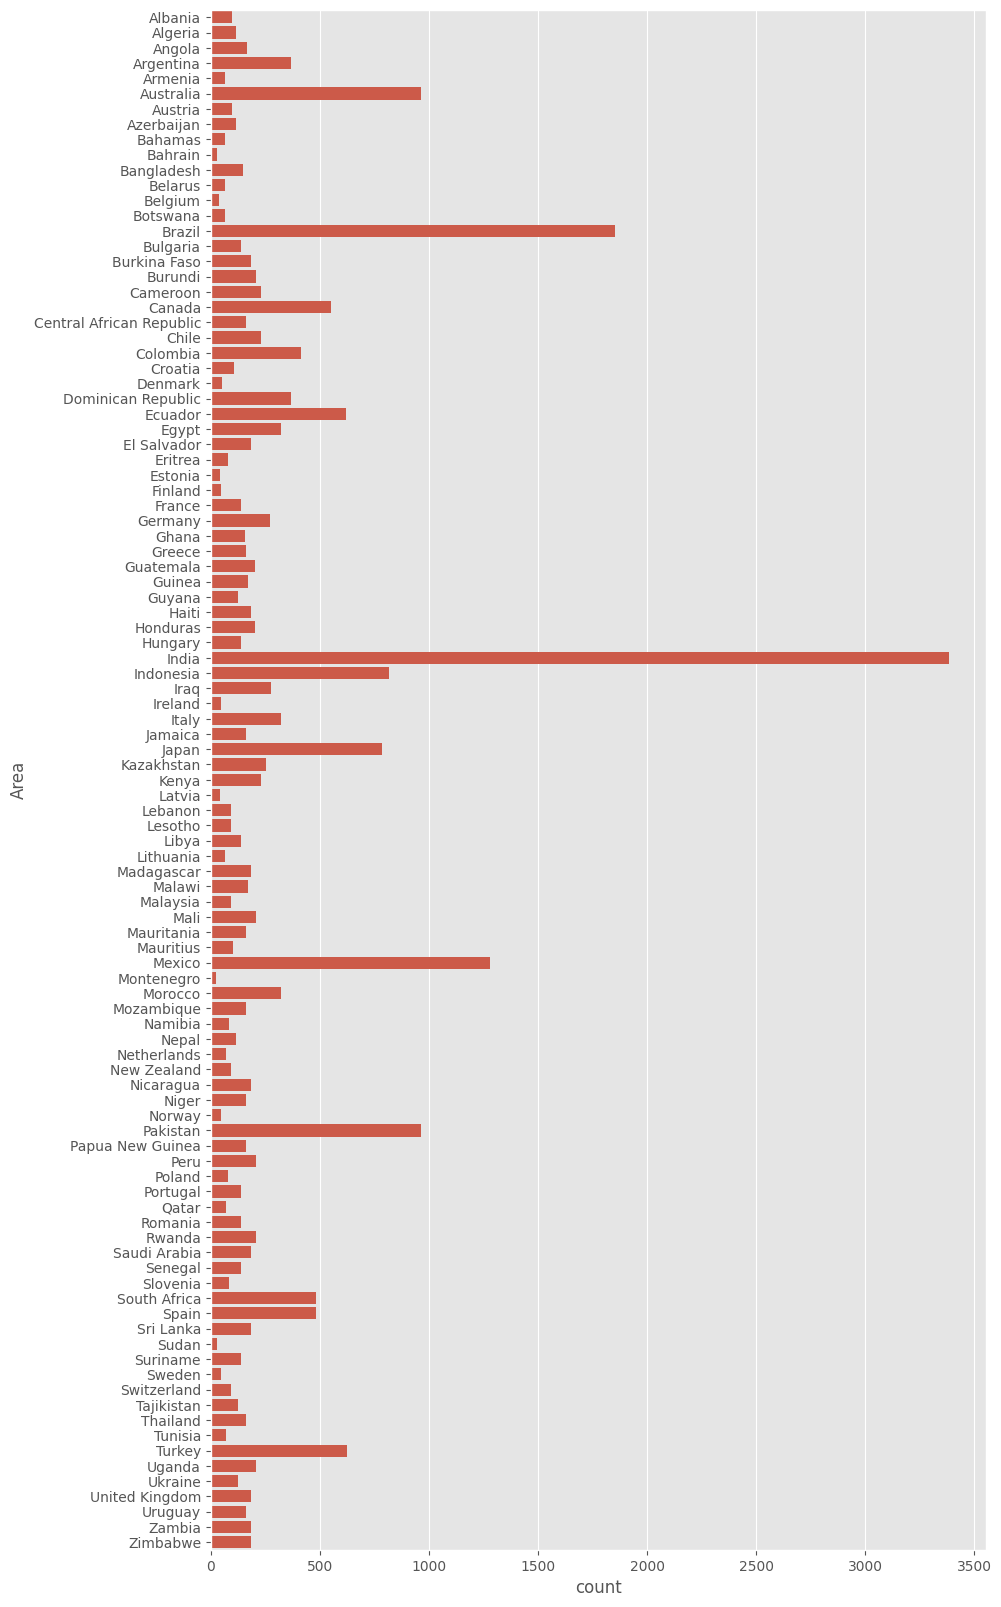

In [ ]:
plt.figure(figsize=(10, 20))
sns.countplot(y=df['Area'])
plt.show()

**yield_per_country**

In [ ]:
country = df['Area'].unique()

In [ ]:
yield_per_country = df.groupby('Area')['hg/ha_yield'].sum()

In [ ]:
yield_per_country

,hg/ha_yield
Area,
Albania,5711536
Algeria,6711464
Angola,5722563
Argentina,32864032
Armenia,4524100
...,...
Ukraine,5496901
United Kingdom,44335992
Uruguay,9539820


**GRAPH of Yield per country**



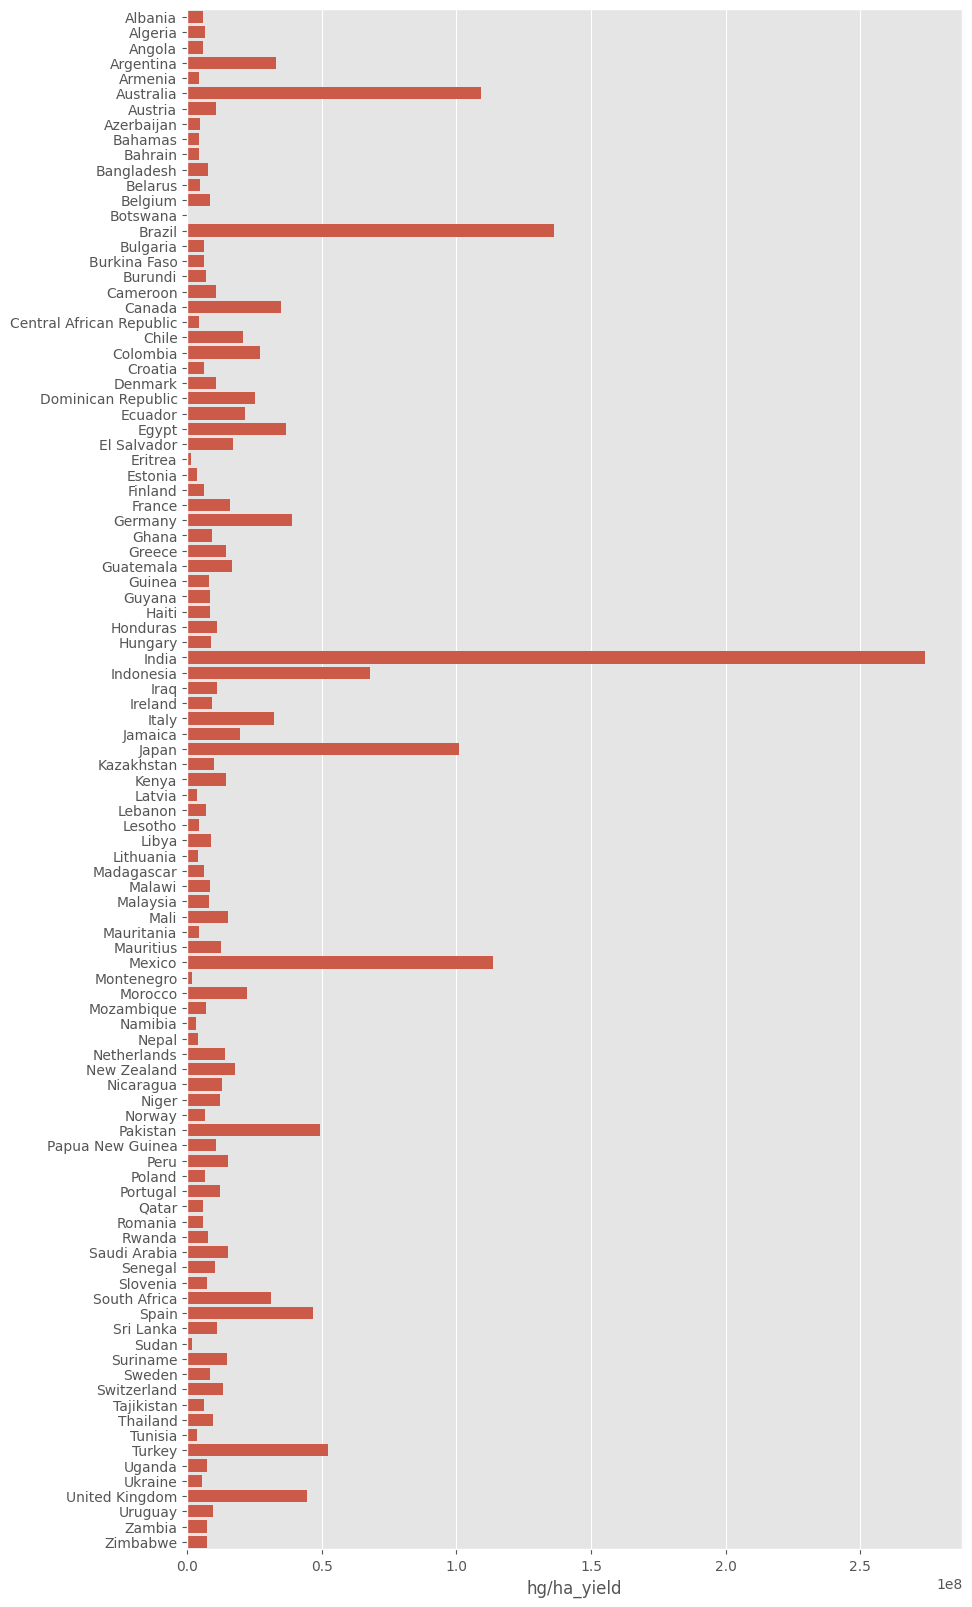

In [ ]:
plt.figure(figsize=(10, 20))
sns.barplot(y=country, x=yield_per_country)
plt.show()

**Yield VS Item**

In [ ]:
df['Item'].value_counts()

,count
Item,
Potatoes,3956
Maize,3824
Wheat,3539
"Rice, paddy",3091
Soybeans,2940
Sorghum,2770
Sweet potatoes,2593
Cassava,1889
Yams,774


<Axes: xlabel='count', ylabel='Item'>

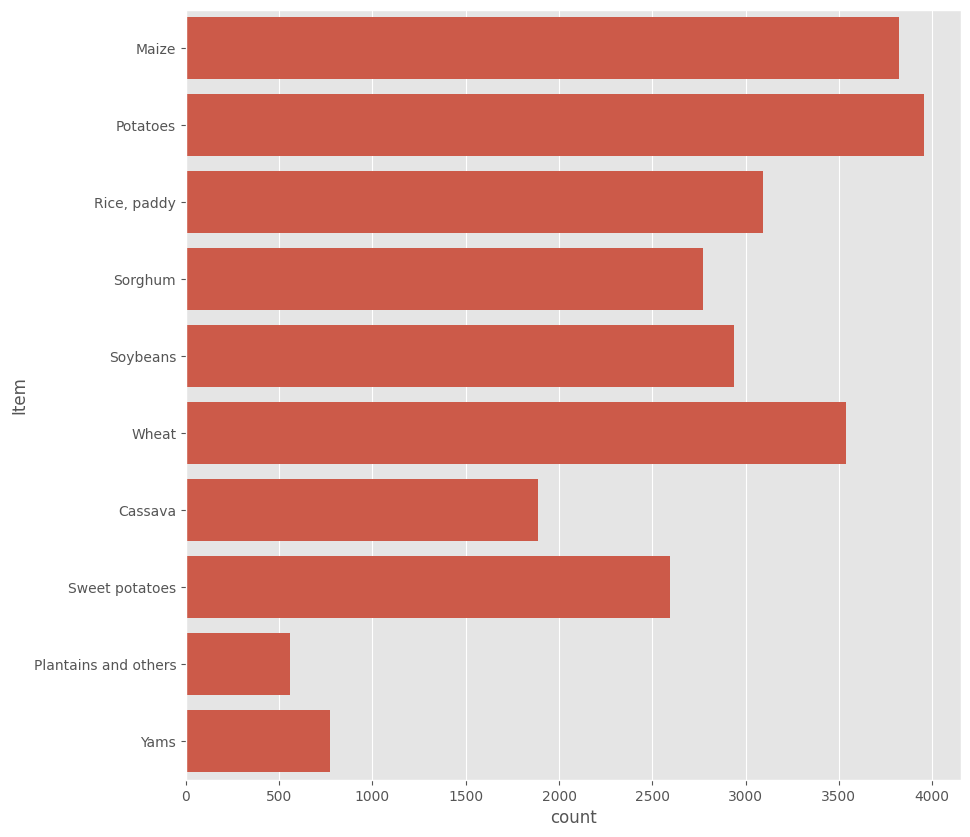

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(y=df['Item'])

In [ ]:
crops = df['Item'].unique()

In [ ]:
len(crops)

10

In [ ]:
yield_per_item = df.groupby('Item')['hg/ha_yield'].sum()

In [ ]:
yield_per_item

,hg/ha_yield
Item,
Cassava,275132269
Maize,142020761
Plantains and others,58958974
Potatoes,785921609
"Rice, paddy",127646024
Sorghum,52906376
Soybeans,49957039
Sweet potatoes,310269345
Wheat,106614786


**GRAPH of Yield Per Item**

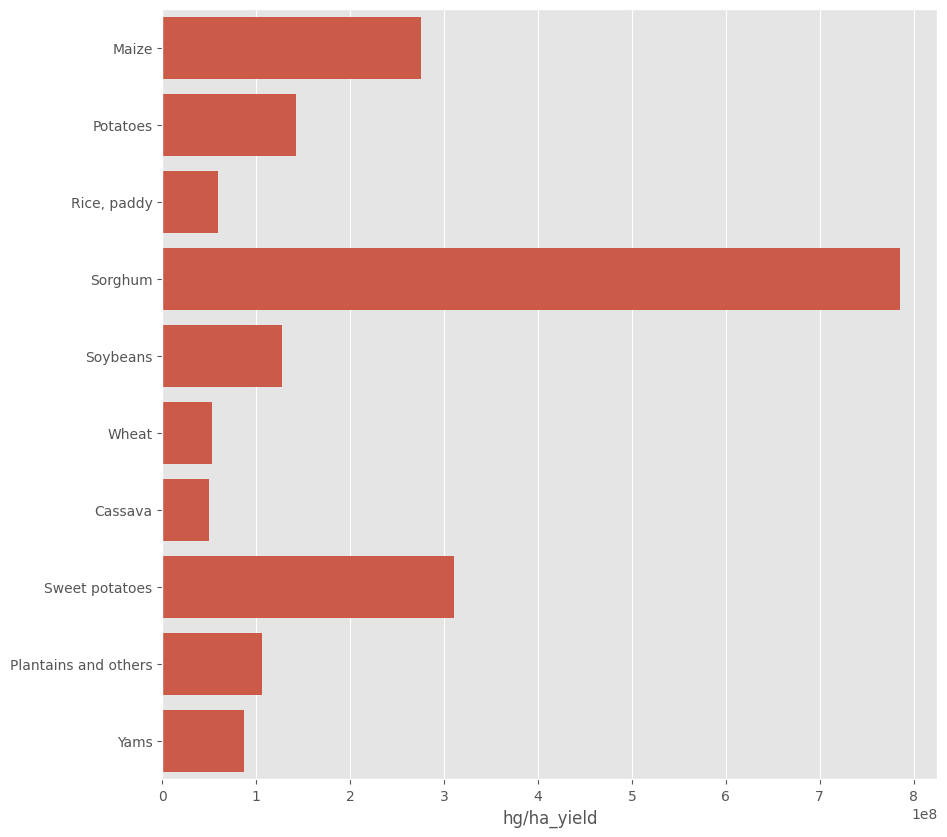

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(y=crops, x=yield_per_item)
plt.show()

**Train Test Split**

In [ ]:
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [ ]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df = df[col]

In [ ]:
df.head(2)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667


In [ ]:
x = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(20745, 6)

In [ ]:
x_test.shape

(5187, 6)

In [ ]:
df.shape

(25932, 7)

In [ ]:
x_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652.0,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240.0,98328.63,27.51,Colombia,Maize
28212,2010,657.0,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410.0,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854.0,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537.0,36572.75,7.85,Canada,Wheat
860,1991,534.0,17866.00,18.73,Australia,Potatoes
17223,1998,250.0,6416.14,6.94,Kazakhstan,Potatoes


**Converting Categorical to Numerical value and Values Scaling**

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe, ['Area', 'Item']),
        ('scaler', scaler, ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'])
    ],  remainder='passthrough'
)

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(drop='first'),
                                 ['Area', 'Item']),
                                ('scaler', StandardScaler(),
                                 ['Year', 'average_rain_fall_mm_per_year',
                                  'pesticides_tonnes', 'avg_temp'])])

In [ ]:
x_train_dummy = preprocessor.fit_transform(x_train)
x_test_dummy = preprocessor.transform(x_test)

In [ ]:
x_train_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122877 stored elements and shape (20745, 113)>

In [ ]:
x_test_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30727 stored elements and shape (5187, 113)>

**Traing Models**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
models = {
     'lr': LinearRegression(),
     'ridge': Ridge(),
     'lasso': Lasso(),
     'dtr': DecisionTreeRegressor(),
     'knn': KNeighborsRegressor()
}
for name,mod in models.items():
  mod.fit(x_train_dummy,y_train)
  y_pred = mod.predict(x_test_dummy)

  print(f"{name}MSE : {mean_absolute_error(y_test,y_pred)} Score {r2_score(y_test,y_pred)}")

lrMSE : 29920.761340711597 Score 0.7486566530283931
ridgeMSE : 29875.000895927205 Score 0.7485397180960003


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.43359, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lassoMSE : 29907.604370717872 Score 0.7485842229351424
dtrMSE : 4062.2702911123965 Score 0.9780873336604137
knnMSE : 4868.653518411414 Score 0.9823106927202787


**Model Select**

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_dummy,y_train)
dtr.predict(x_test_dummy)

array([167489.,  15838.,  72614., ...,  52692.,   9621., 132600.])

In [ ]:
def prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
 features = np.array([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]])
 feature_names = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item']
 features_df = pd.DataFrame(features, columns=feature_names)
 tranformed_features = preprocessor.transform(features_df)
 predicted_yield = dtr.predict(tranformed_features).reshape(1,-1)
 return predicted_yield[0]

In [ ]:
Year = 2000
average_rain_fall_mm_per_year = 59.0
pesticides_tonnes = 3024.11
avg_temp = 26.55
Area = 'Saudi Arabia'
Item= 'Sorghum'
result = prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item)

In [ ]:
result

array([13384.])

**PICKLE FILES**

In [ ]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))